In [975]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
lb_encoder = LabelEncoder()

In [976]:
data = pd.read_csv(r'I:\Python\dataSet\ml\HR_Employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Education = {1 'Below College',2 'College',3 'Bachelor',4 'Master',5 'Doctor'}

EnvironmentSatisfaction = {1 'Low',2 'Medium',3 'High',4 'Very High'}

JobInvolvement = {1 'Low',2 'Medium',3 'High',4 'Very High'}

JobSatisfaction = {1 'Low',2 'Medium',3 'High'4 'Very High'}

PerformanceRating = {1 'Low',2 'Good',3 'Excellent',4 'Outstanding'}

RelationshipSatisfaction = {1 'Low',2 'Medium',3 'High',4 'Very High'}

WorkLifeBalance = {1 'Bad',2 'Good',3 'Better',4 'Best'}

JobRole = {7 'Sales Executive', 6 'Research Scientist', 2 'Laboratory Technician', 4 'Manufacturing Director',
        0'Healthcare Representative', 3 'Manager', 8 'Sales Representative', 5 'Research Director', 1 'Human Resources'}

MaritalStatus = {2 'Single', 1 'Married', 0 'Divorced'}

In [977]:
data['JobInvolvement'].replace(to_replace=[1,2,3,4], value=['Low', 'Medium', 'High', 'Very High'], inplace=True)
data['JobSatisfaction'].replace(to_replace=[1,2,3,4], value=['Low', 'Medium', 'High', 'Very High'], inplace=True)
data['PerformanceRating'].replace(to_replace=[1,2,3,4], value=['low','Good','Excellent','Outstanding'], inplace=True)
data['RelationshipSatisfaction'].replace(to_replace=[1,2,3,4], value=['Low', 'Medium', 'High', 'Very High'], inplace=True)
data['WorkLifeBalance'].replace(to_replace=[1,2,3,4], value=['Bad', 'Good', 'Better', 'Best'], inplace=True)
data['EnvironmentSatisfaction'].replace(to_replace=[1,2,3,4], value=['Low', 'Medium', 'High', 'Very High'], inplace=True)
data['Education'].replace(to_replace=[1,2,3,4,5], value=['Below College','College','Bachelor','Master','Doctor'], inplace=True)

# Preprocessing Data

In [978]:
cols = []
for col in data.columns:
    if(data[col].dtype == np.int64):
        cols.append(col)
cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [979]:
# find the outlier data 
def find_outlier(column):
    number_cols_ph = data[column].count()
    first_quartile = np.quantile(data[column], 0.25)
    third_quartile = np.quantile(data[column], 0.75)
    IQR = third_quartile - first_quartile
    min_outlier = first_quartile - (1.5 * IQR)
    max_outlier = third_quartile + (1.5 * IQR)
    print(f'the data less than {min_outlier} and more than {max_outlier} is the outlier data')
    return min_outlier, max_outlier

# remove the outlier data 
def remove_outlier(column):
    min_outlier, max_outlier = find_outlier(column)
    count_min = data[column].loc[data[column]<min_outlier].count()
    count_max = data[column].loc[data[column]>max_outlier].count()
    data[column].loc[data[column]<min_outlier] = np.nan
    data[column].loc[data[column]>max_outlier] = np.nan
    count = count_min + count_max
    return count

In [980]:
for col in cols:
    find_outlier(col)
    count_of_liers = remove_outlier(col) 
    print(count_of_liers) 

the data less than 10.5 and more than 62.5 is the outlier data
the data less than 10.5 and more than 62.5 is the outlier data
0
the data less than -573.0 and more than 2195.0 is the outlier data
the data less than -573.0 and more than 2195.0 is the outlier data
0
the data less than -16.0 and more than 32.0 is the outlier data
the data less than -16.0 and more than 32.0 is the outlier data
0
the data less than 1.0 and more than 1.0 is the outlier data
the data less than 1.0 and more than 1.0 is the outlier data
0
the data less than -1105.5 and more than 3152.5 is the outlier data
the data less than -1105.5 and more than 3152.5 is the outlier data
0
the data less than -5.625 and more than 137.375 is the outlier data
the data less than -5.625 and more than 137.375 is the outlier data
0
the data less than -2.0 and more than 6.0 is the outlier data
the data less than -2.0 and more than 6.0 is the outlier data
0
the data less than -5291.0 and more than 16581.0 is the outlier data
the data le

C:\Users\Mohamed Hamde\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Check the duplicated values

In [981]:
data.duplicated().sum()

0

## Check the null values

In [982]:
data.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtC

In [983]:
data.dropna(inplace=True)

In [984]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis

## Add Column = count

In [985]:
count = 1
for i in range(len(data)):
    data['count'] = count

## Describe Data

In [986]:
round(data.describe(), 2)

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,count
count,925.00,925.00,925.00,925.0,925.00,925.00,925.00,925.00,925.00,925.00,925.00,925.0,925.00,925.00,925.00,925.00,925.00,925.00,925.00,925.0
mean,35.42,799.05,9.33,1.0,1029.52,65.98,1.74,5080.28,14142.87,2.46,15.36,80.0,0.67,9.01,2.52,5.43,3.59,1.42,3.55,1.0
std,8.63,402.14,8.14,0.0,605.53,20.48,0.75,2919.38,7005.69,2.21,3.64,0.0,0.69,5.25,0.75,3.68,3.05,1.97,3.04,0.0
min,18.00,103.00,1.00,1.0,2.00,30.00,1.00,1051.00,2097.00,0.00,11.00,80.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.0
25%,29.00,461.00,2.00,1.0,498.00,48.00,1.00,2774.00,8277.00,1.00,12.00,80.0,0.00,5.00,2.00,2.00,2.00,0.00,2.00,1.0
50%,34.00,802.00,7.00,1.0,1007.00,66.00,2.00,4404.00,13982.00,1.00,14.00,80.0,1.00,9.00,2.00,5.00,2.00,1.00,2.00,1.0
75%,40.00,1157.00,14.00,1.0,1568.00,84.00,2.00,6334.00,20115.00,4.00,18.00,80.0,1.00,12.00,3.00,8.00,7.00,2.00,7.00,1.0
max,60.00,1498.00,29.00,1.0,2068.00,100.00,4.00,16422.00,26968.00,8.00,25.00,80.0,2.00,28.00,4.00,18.00,14.00,7.00,13.00,1.0


In [987]:
data.describe(include=object).T

,count,unique,top,freq
Attrition,925,2,No,762
BusinessTravel,925,3,Travel_Rarely,659
Department,925,3,Research & Development,594
Education,925,5,Bachelor,358
EducationField,925,6,Life Sciences,388
EnvironmentSatisfaction,925,4,High,291
Gender,925,2,Male,572
JobInvolvement,925,4,High,550
JobRole,925,9,Sales Executive,220
JobSatisfaction,925,4,Very High,287


<AxesSubplot:>

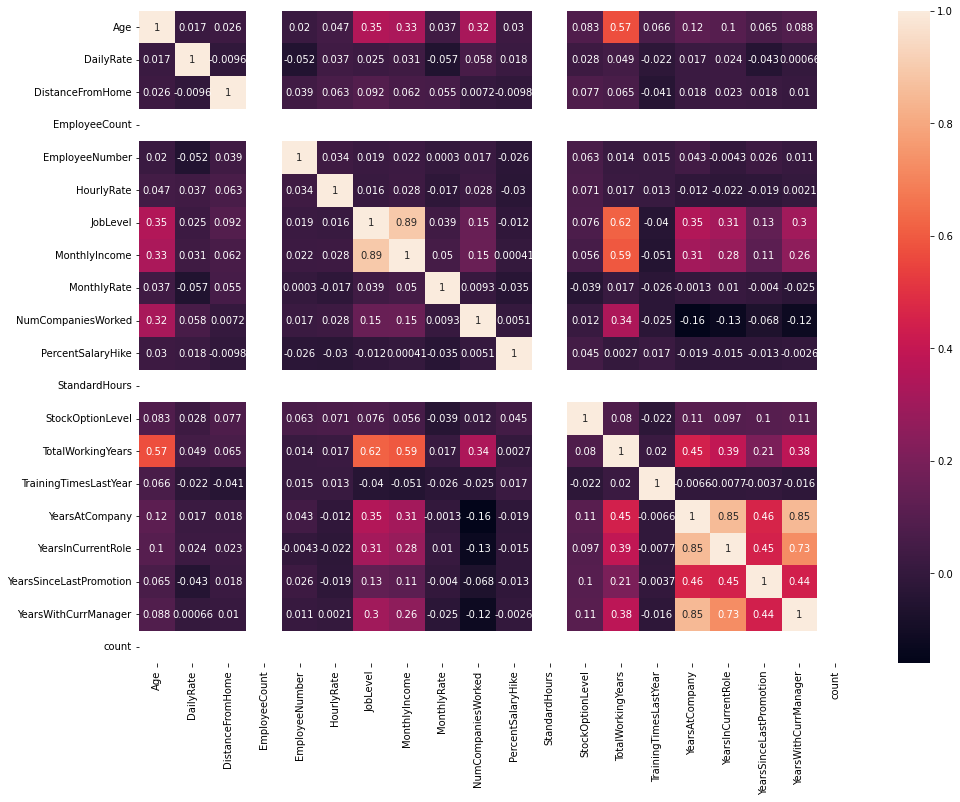

In [988]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True)

## Distribution of Attrition

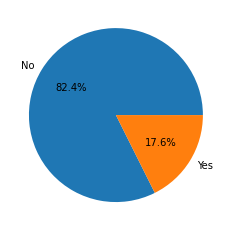

In [990]:
attrition_value_counts = data['Attrition'].value_counts()
plt.pie(attrition_value_counts, labels=attrition_value_counts.index, autopct='%1.1f%%')
plt.show()

## Distribution of Gender

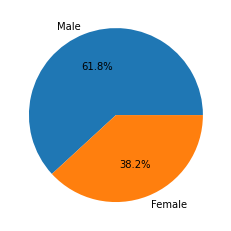

In [991]:
gender_value_counts = data.Gender.value_counts()
plt.pie(gender_value_counts, labels=gender_value_counts.index, autopct='%1.1f%%')
plt.show()

## Distribution of Age by Gender

In [992]:
data_age_gender = data.groupby(['Age','Gender'])['count'].count().reset_index().sort_values('count',ascending=False)
data_age_gender

,Age,Gender,count
35,35.0,Male,40
33,34.0,Male,32
29,32.0,Male,31
27,31.0,Male,31
23,29.0,Male,30
...,...,...,...
80,59.0,Female,2
81,59.0,Male,2
70,53.0,Female,1
73,54.0,Male,1


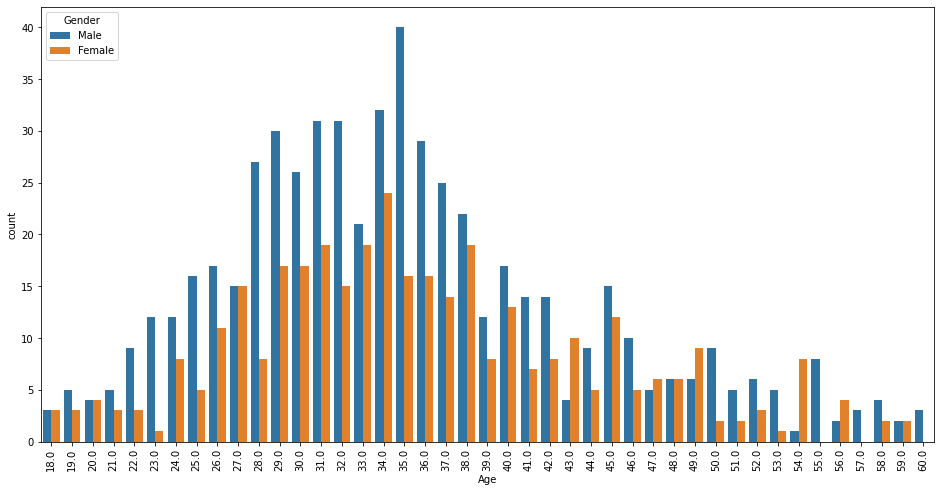

In [993]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Age', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

## Distribution of Attrition by Gender

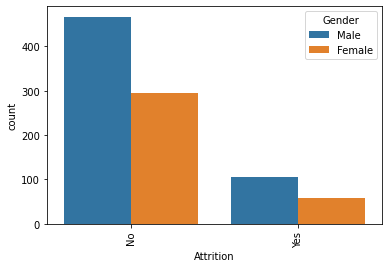

In [994]:
sns.countplot(x='Attrition', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

# Data Analysis

## What is the effect of age on attrition ?

<AxesSubplot:xlabel='Age', ylabel='Count'>

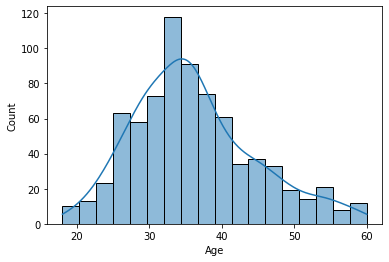

In [995]:
sns.histplot(data_attrition_no['Age'], kde=True)
# normal data

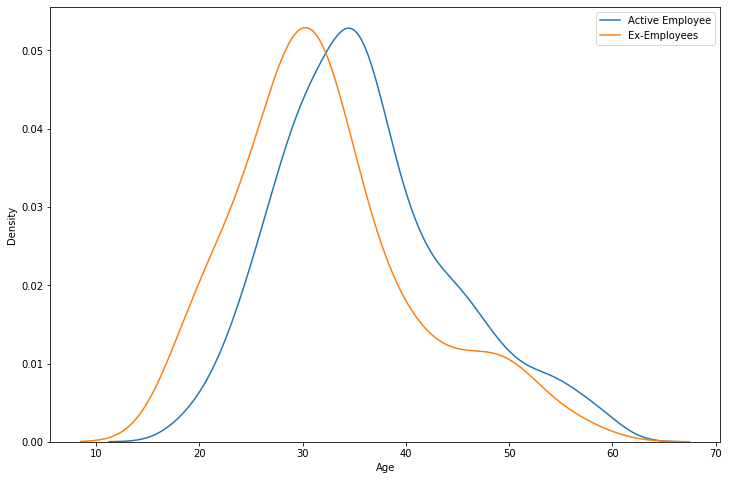

In [1017]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Age', data=data_attrition_no, label = 'Active Employee')
sns.kdeplot(x='Age', data=data_attrition_yes, label = 'Ex-Employees')
plt.legend()

In [1018]:
data_attrition_no = data[data['Attrition'] == 'No']
data_attrition_yes = data[data['Attrition'] == 'Yes']

In [1019]:
age_mean_no = data_attrition_no['Age'].mean()
age_std_no = data_attrition_no['Age'].std()

age_mean_yes = data_attrition_yes['Age'].mean()
age_std_yes = data_attrition_yes['Age'].std()

norm_age_cdf_no = stats.norm.cdf(30, age_mean_no, age_std_no)
norm_age_cdf_yes = stats.norm.cdf(30, age_mean_yes, age_std_yes)

print(f'The probability of Active Employee less than 30 years old is {norm_age_cdf_no}')
print(f'The probability of Ex Employee less than 30 years old is {norm_age_cdf_yes}')

The probability of Active Employee less than 30 years old is 0.23581879631993735
The probability of Ex Employee less than 30 years old is 0.39739852095654304


* As we can see 39% from Ex Employees who have age less than 30 , so the attrition is impacting by age..
* The Employee's leaving tend to be younger.

## Is income the main factor towards employee attrition?

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

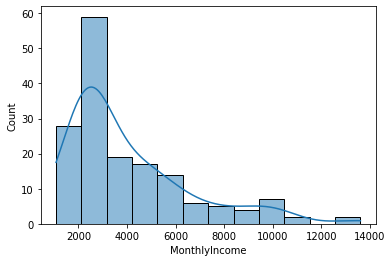

In [1000]:
sns.histplot(data_attrition_yes['MonthlyIncome' ], kde=True)

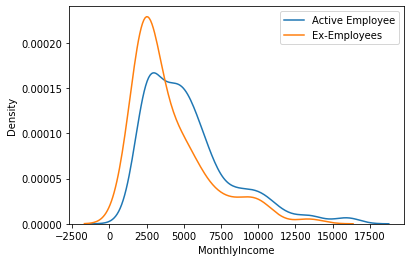

In [1020]:
sns.kdeplot(x=data_attrition_no['MonthlyIncome' ], label = 'Active Employee')
sns.kdeplot(x=data_attrition_yes['MonthlyIncome' ],   label = 'Ex-Employees')
plt.legend()

In [1023]:
monthIncome_mean_no = data_attrition_no['MonthlyIncome'].mean()
monthIncome_std_no = data_attrition_no['MonthlyIncome'].std()

monthIncome_mean_yes = data_attrition_yes['MonthlyIncome'].mean()
monthIncome_std_yes = data_attrition_yes['MonthlyIncome'].std()

norm_monthIncome_cdf_no = stats.norm.cdf(5000, monthIncome_mean_no, monthIncome_std_no)
norm_monthIncome_cdf_yes = stats.norm.cdf(5000, monthIncome_mean_yes, monthIncome_std_yes)

print(f'The probability of Active Employees who have monthly income less than 5k is {norm_monthIncome_cdf_no}')
print(f'The probability of Ex Employees who have monthly income less than 5k {norm_monthIncome_cdf_yes}')

The probability of Active Employees who have monthly income less than 5k is 0.4594399165866563
The probability of Ex Employees who have monthly income less than 5k 0.6451631099848599


* As we can see 64% from Ex Employees who have monthly income less than 5k , so the attrition is impacting by income.. 

## Does the Department of work impact attrition?

In [1003]:
pd.crosstab(data.Department, data.Attrition, margins = True)

Attrition,No,Yes,All
Department,,,
Human Resources,32,7,39
Research & Development,500,94,594
Sales,230,62,292
All,762,163,925


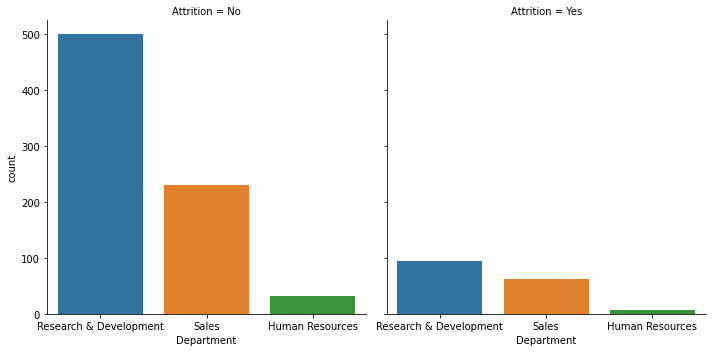

In [1004]:
sns.catplot(x='Department',col='Attrition', data=data, kind='count')
plt.show()

* The worker in Research & Development are more likely to stay then the workers on other departement.

## How does the environment satisfaction impact attrition?

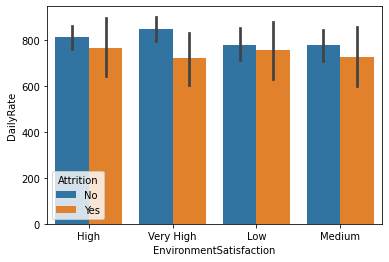

In [1005]:
sns.barplot(y='DailyRate', x='EnvironmentSatisfaction', hue='Attrition', data=data) 
plt.show()  

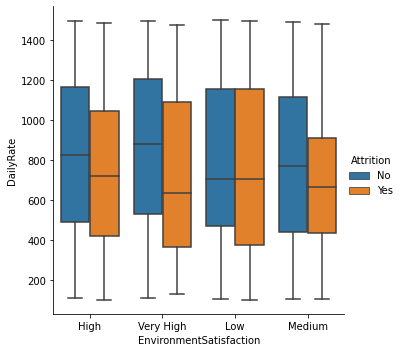

In [1006]:
sns.catplot(y='DailyRate', x='EnvironmentSatisfaction', hue='Attrition', kind='box', data=data)
plt.show()

* No Impact..

# How Is Attrition Affected by business travels?

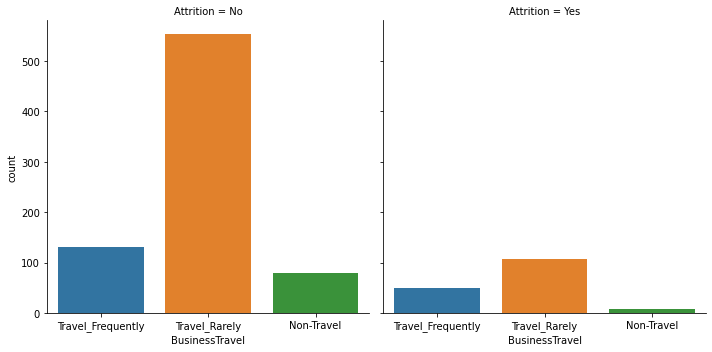

In [1007]:
sns.catplot(x='BusinessTravel',col='Attrition', data=data, kind='count')
plt.show()

* We can see the Employees who travel rarely have most chance to leave the company, but i think there is no impact..

## What is effect of the distance from home on attrition ?

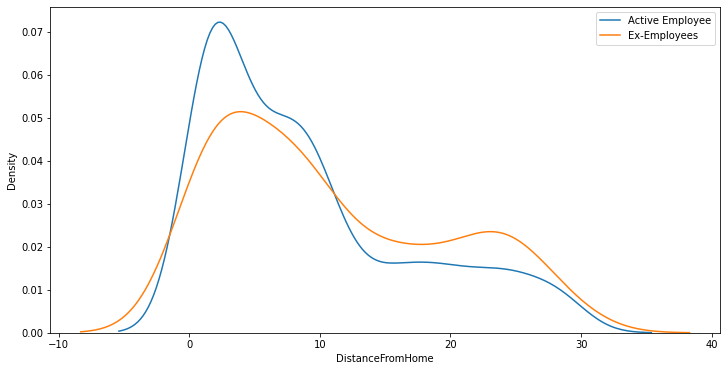

In [1008]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=data_attrition_no.DistanceFromHome, label = 'Active Employee')
sns.kdeplot(x=data_attrition_yes.DistanceFromHome, label = 'Ex-Employees')
plt.legend()

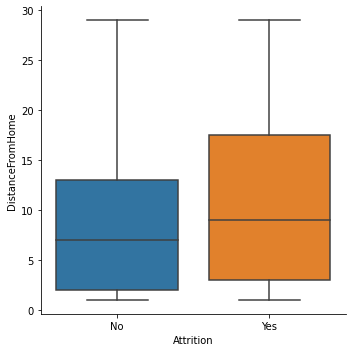

In [1009]:
sns.catplot(y='DistanceFromHome', x='Attrition', kind='box', data=data)

* As we can see the Employee's leaving tend to be farther from home.

## How does self Job Satisfaction impact the Attrition?

In [1010]:
cross = pd.crosstab(data.JobSatisfaction, data.Attrition)
cross.reset_index()

Attrition,JobSatisfaction,No,Yes
0,High,224,50
1,Low,143,46
2,Medium,143,32
3,Very High,252,35


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

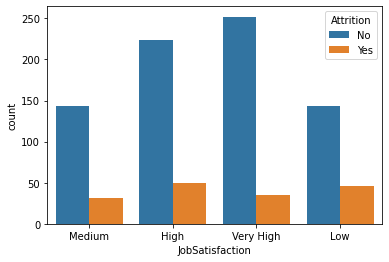

In [1011]:
sns.countplot(x=data.JobSatisfaction, hue=data.Attrition)

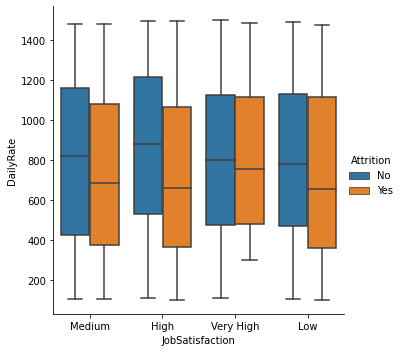

In [1012]:
sns.catplot(x='JobSatisfaction', y='DailyRate', hue='Attrition', kind='box', data=data)

## How does Work Life Balance impact the overall attrition rates?

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

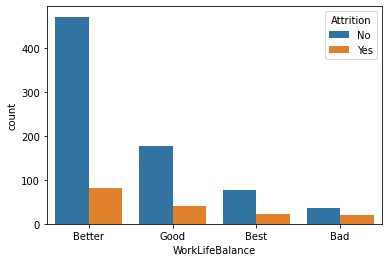

In [1013]:
sns.countplot(x=data.WorkLifeBalance, hue=data.Attrition)

## How does work experience affect attrition?

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

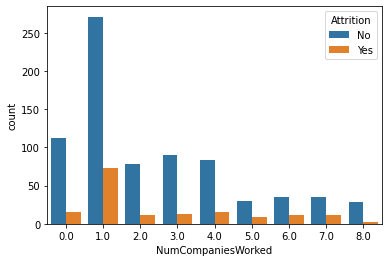

In [1014]:
sns.countplot(x=data.NumCompaniesWorked, hue=data.Attrition)

## How does work duration in current role impact Attrition?

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

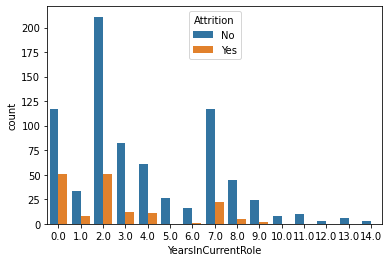

In [1015]:
sns.countplot(x=data.YearsInCurrentRole, hue=data.Attrition)

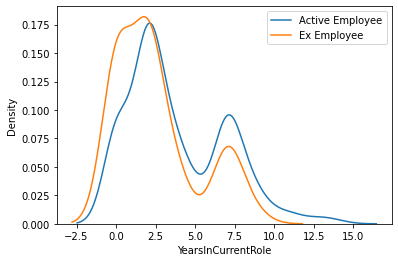

In [1016]:
sns.kdeplot(data_attrition_no.YearsInCurrentRole, label='Active Employee')
sns.kdeplot(data_attrition_yes.YearsInCurrentRole, label='Ex Employee')
plt.legend()

* if years in current role increase we can see there is no Ex_Employees..  

## 📝 Conclusions:
Columns have impact on Attrition:
*  Age
*  Monthly Income
*  Distance From Home
*  Years In Current Role

In [1024]:
data.to_csv('I:\Python\dataSet\ml\HR_Employee_tableau.csv')